# SD_TSIA210 Bagging and Random Forests
## Ahlem JOUIDI
## Ramzi HAMDI


In [1]:
import numpy as np
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

import math
from numpy import linalg as LA
from scipy.stats import binom
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
# Enable inline plotting
from scipy.special import binom
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline

# Math question 

$ \textit{ Let us consider L binary independent classifiers where the probability of a correct
prediction is p > 0:5. Then, the prediction of the aggregation of models follows a Binomial distribution
with parameters p and L (Why ?) . } $

the probability of good prediction of the aggregation rule is equal
$$ P( \sum_{i=1}^{L} fi \ge \frac{L}{2} ) = 1 -  P( \sum_{i=1}^{L} fi \leqslant \frac{L}{2} ) \\
= 1 -  \sum_{k=1}^{\frac{L}{2}} \binom{L}{k} p^k (1-p)^{(L-k)}$$
For L = 10 and p=0.7 : 

In [2]:
p= 0.7
L=10
P=0
for k in range(1,6) :
    P=P+binom(L, k) * p**k * (1-p)**(L-k)
P=1-P
print('The probability of good prediction of the aggregation rule with L=10 and P=0.7 is ', P)

The probability of good prediction of the aggregation rule with L=10 and P=0.7 is  0.8497375722999999


# Question 1

$ \textit{The implementation of the Binomial distribution in scipy}$

In [3]:
L=10 ##Number of classifiers
p1=0.7 ##the probability of a correct prediction
p=0.5

In [4]:
 ## Binomial distribtion
rv1 = binom(L, p1)
rv= binom(L,p)


In [ ]:

L = 10 # 10 classifiers.
p = 0.7

fig, ax = plt.subplots(1, 1)
#x = np.arange(binom.ppf(0.01, L, p),binom.ppf(0.99, L, p)) #quantiles

# the probability mass function
ax.plot(x, binom.pmf(x, L, p), 'ro', ms=8, label='Binom pmf')
ax.vlines(x, 0, binom.pmf(x, L, p), colors='r', lw=5, alpha=0.5) #Plot vertical lines at each x from ymin to ymax.

rv = binom(L, p)
ax.vlines(x, 0, rv.pmf(x), colors='K', linestyles='-', lw=1,
          label='Frozen pmf') 

ax.legend(loc='best', frameon=False)
#plt.title('Probability of correct prediction for the aggregation of models (p=0.7)')
#plt.show()

With p=0.5, we get a symmetric distribution. So we have an equal probability (0.5) to have correct or wrong global estimation.

We see clearly that with higher probability of a correct prediction (0.7 > 0.5) we get more chance 
to have a correct global estimation.

# Bagging

$ \textit { Use Bagging with first decision trees of depth 1 (called stumps) and then with decision trees
characterized by a greater depth.} $

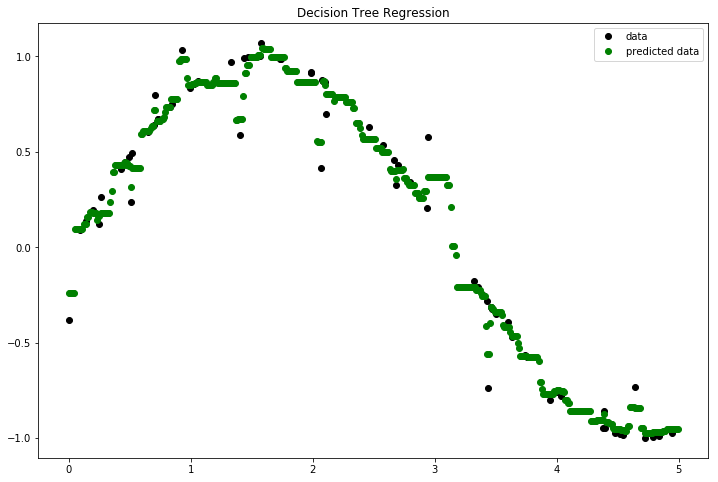

In [68]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16))
n_estimators = 10 # L in the text
tree_max_depth = 10
# TODO define the regressor by bagging stumps
tree = DecisionTreeRegressor(criterion='mse',   ### We define a Tree with mse criterion and best as splitter.
                             splitter='best',
                             max_depth=tree_max_depth,  ### No prune
                             min_samples_split=2) 
tree.fit(X, y)                                  ### Fitting the model
bagging = BaggingRegressor(base_estimator=None, ### We define the bagging regressor
                           n_estimators=n_estimators, 
                           max_samples=1.0,
                           max_features=1.0,
                           bootstrap=True)
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree = tree.predict(X_test)
bagging.fit(X,y)
y_bagging = bagging.predict(X_test)
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
# TODO add plots for Bagging/Tree
plt.plot(X_test, y_bagging, 'o', c="g", label="predicted data")
plt.title("Decision Tree Regression")
plt.legend(loc=1, numpoints=1)
plt.show()

# Question 2

$ \textit {Graphically illustrate the roles of L and of the tree depth (max_depth). }$

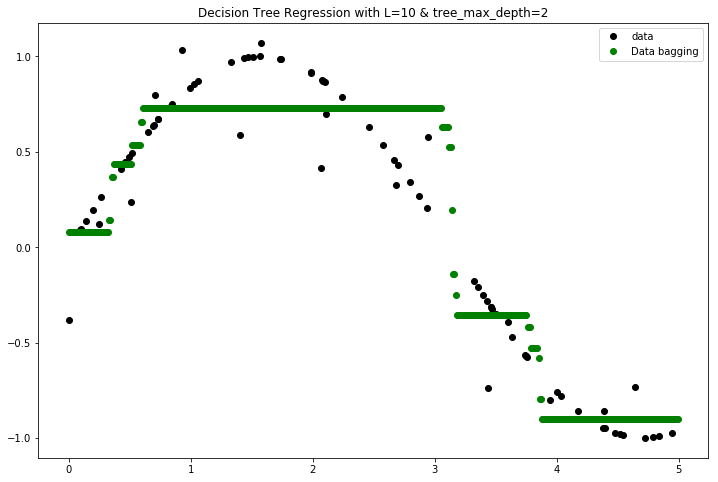

In [69]:
n_estimators = 10  # L in the text
tree_max_depth = 2  ## Prunning the tree to 2 childs

tree = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=tree_max_depth, min_samples_split=2) 
tree.fit(X, y)
bagging = BaggingRegressor(base_estimator=tree,n_estimators=n_estimators, max_samples=1.0,max_features=1.0,bootstrap=True)
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree = tree.predict(X_test)
bagging.fit(X,y)
y_bagging = bagging.predict(X_test)
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
#  plots for Bagging/Tree
plt.plot(X_test, y_bagging, 'o', c="g", label="Data bagging")
plt.title("Decision Tree Regression with L=10 & tree_max_depth=2")
plt.legend(loc=1, numpoints=1)
plt.show()

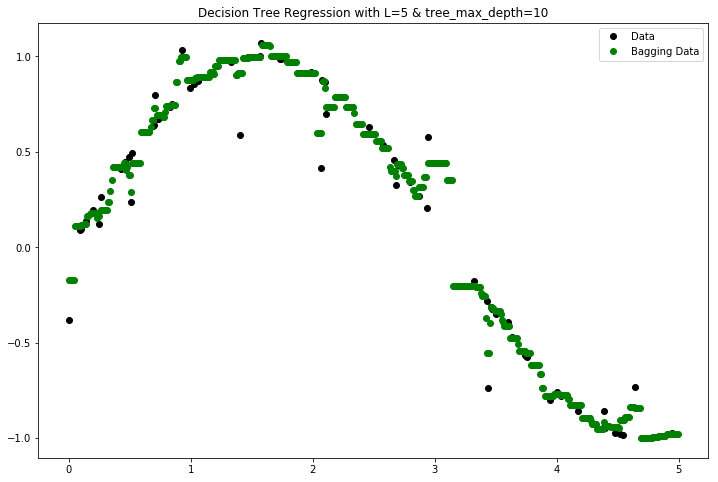

In [70]:
n_estimators = 5# L in the text
tree_max_depth = 10
# TODO define the regressor by bagging stumps
tree = DecisionTreeRegressor(criterion='mse', 
                             splitter='best', 
                             max_depth=tree_max_depth, 
                             min_samples_split=2) 
tree.fit(X, y)
bagging = BaggingRegressor(base_estimator=tree,
                           n_estimators=n_estimators, 
                           max_samples=1.0,
                           max_features=1.0,
                           bootstrap=True)
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree = tree.predict(X_test)
bagging.fit(X,y)
y_bagging = bagging.predict(X_test)
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="Data")
# TODO add plots for Bagging/Tree
plt.plot(X_test, y_bagging, 'o', c="g", label="Bagging Data")
plt.title("Decision Tree Regression with L=5 & tree_max_depth=10")
plt.legend(loc=1, numpoints=1)
plt.show()

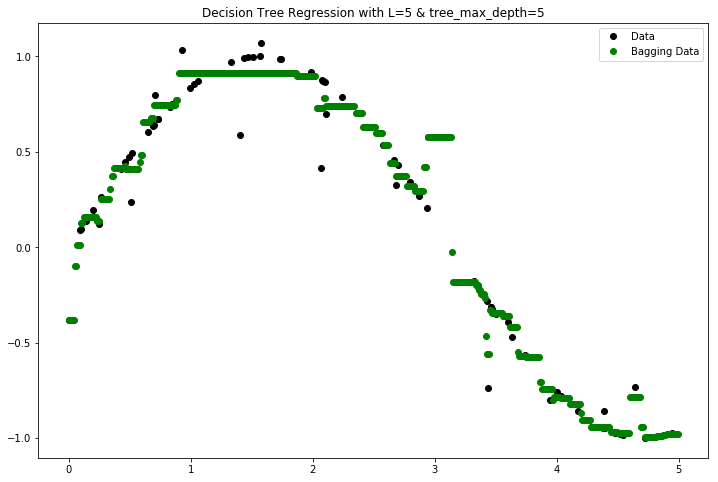

In [71]:
n_estimators = 5# L in the text
tree_max_depth = 5
# TODO define the regressor by bagging stumps
tree = DecisionTreeRegressor(criterion='mse', 
                             splitter='best', 
                             max_depth=tree_max_depth, 
                             min_samples_split=2) 
tree.fit(X, y)
bagging = BaggingRegressor(base_estimator=tree,
                           n_estimators=n_estimators, 
                           max_samples=1.0,
                           max_features=1.0,
                           bootstrap=True)
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree = tree.predict(X_test)
bagging.fit(X,y)
y_bagging = bagging.predict(X_test)
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="Data")
# TODO add plots for Bagging/Tree
plt.plot(X_test, y_bagging, 'o', c="g", label="Bagging Data")
plt.title("Decision Tree Regression with L=5 & tree_max_depth=5")
plt.legend(loc=1, numpoints=1)
plt.show()

Interpretation: It can be seen that from this graph that we obtained, that the more the depth of the arbe is more important, the more the arbe becomes more adapted to the training-set. Which may not be good when making the prediction on the test-set.
Also by increasing the number of classifiers, we obtain a model more adapted to the training-set.

# Question 3

$ \textit {How can we check that the estimators computed with the decision trees are biased and that the
ones based on bagging reduce the variance ? } $

In [72]:
y_var_tree = np.var(y_tree)
y_bias_tree = (X_test - np.mean(y_tree)) ** 2
y_bias_bagging = (X_test - np.mean(y_bagging)) ** 2
y_var_bagging = np.var(y_bagging)

print('The bias of the decision tree is ', y_var_tree)
print('The bias of the estimator based on bagging estimator is ',y_var_bagging)

print('The variance of the tree estimator is ', y_var_tree)
print('The variance of the estimator based on bagging estimator is ',y_var_bagging)

The bias of the decision tree is  0.5045450151531009
The bias of the estimator based on bagging estimator is  0.49314327566499994
The variance of the tree estimator is  0.5045450151531009
The variance of the estimator based on bagging estimator is  0.49314327566499994


We notice that the bagging reduce the variance.

# Question 4

$ \textit { Playing with the noise level, show the over-fitting (sur-apprentissage). }$

Text(0.5,1,'Data with higher level of noise')

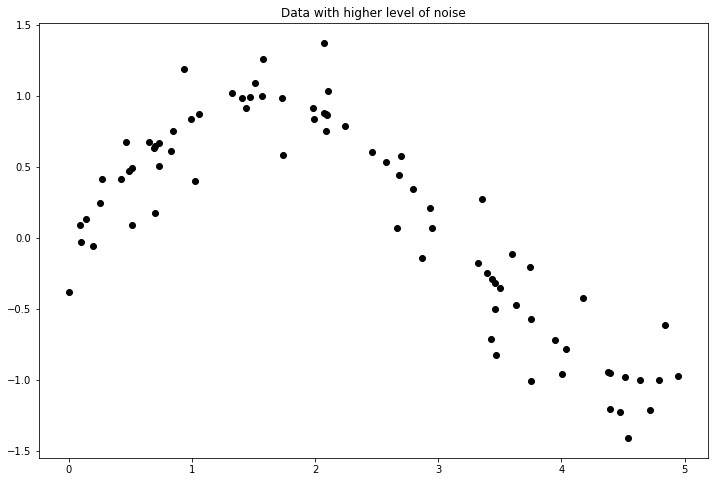

In [73]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::2] += 1 * (0.5 - rng.rand(40))        ### Adding some noise
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data with higher level of noise")
plt.title('Data with higher level of noise')

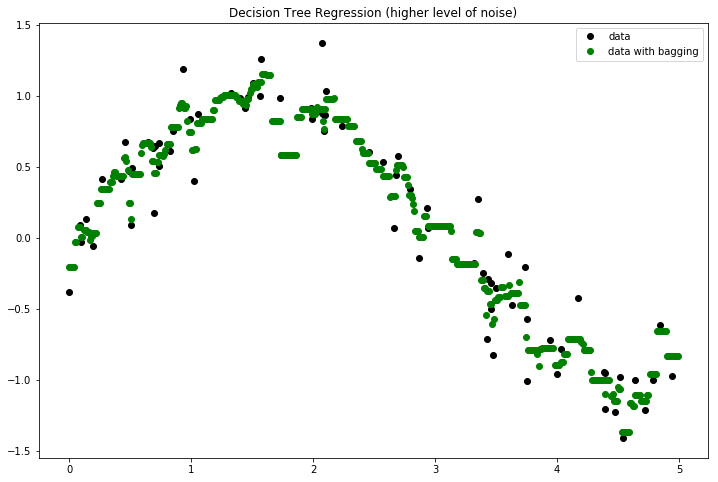

In [74]:
n_estimators = 10 # L in the text
tree_max_depth = 10
# TODO define the regressor by bagging stumps
tree = DecisionTreeRegressor(criterion='mse', 
                             splitter='best', 
                             max_depth=tree_max_depth, 
                             min_samples_split=2) 
tree.fit(X, y)
bagging = BaggingRegressor(base_estimator=tree,
                           n_estimators=n_estimators, 
                           max_samples=1.0,
                           max_features=1.0,
                           bootstrap=True)
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree = tree.predict(X_test)
bagging.fit(X,y)
y_bagging = bagging.predict(X_test)
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
# TODO add plots for Bagging/Tree
plt.plot(X_test, y_bagging, 'o', c="g", label="data with bagging")
plt.title("Decision Tree Regression (higher level of noise)")
plt.legend(loc=1, numpoints=1)
plt.show()

$ \textbf{Reducing the level of noise} $

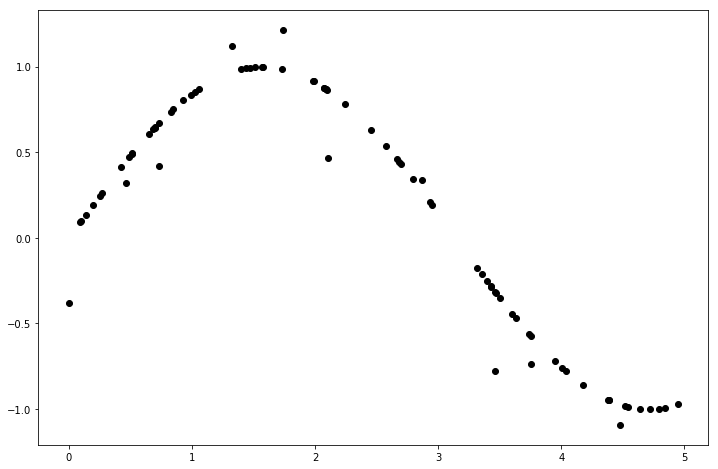

In [75]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)  
y = np.sin(X).ravel()
y[::8] += 1 * (0.5 - rng.rand(10)) ### reducing the noise 
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data") 


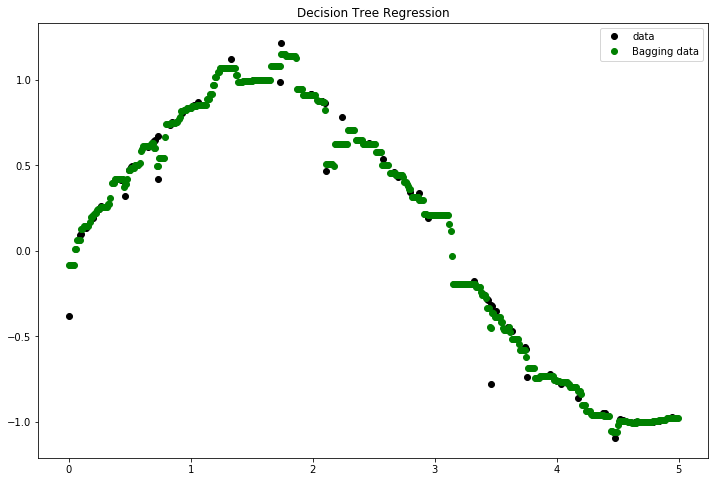

In [76]:
n_estimators = 10 # L in the text
tree_max_depth = 10
# TODO define the regressor by bagging stumps
tree = DecisionTreeRegressor(criterion='mse', 
                             splitter='best', 
                             max_depth=tree_max_depth, 
                             min_samples_split=2) 
tree.fit(X, y)
bagging = BaggingRegressor(base_estimator=tree,
                           n_estimators=n_estimators, 
                           max_samples=1.0,
                           max_features=1.0,
                           bootstrap=True)
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree = tree.predict(X_test)
bagging.fit(X,y)
y_bagging = bagging.predict(X_test)
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
# TODO add plots for Bagging/Tree
plt.plot(X_test, y_bagging, 'o', c="g", label="Bagging data")
plt.title("Decision Tree Regression")
plt.legend(loc=1, numpoints=1)
plt.show()

With low level of noise we have the estimator reproduce very closely the data ==> overfitting 

# Question 5

$ \textit { Show that we can reduce this phenomenon by randomly sub-sampling (sous-échantillonner) without
replacement instead than taking the bootstrap samples. } $

 After checking the documentation of the BaggingRegressor, we have found that the boostrap parametres perform in this way :
   $bootstrap : boolean, optional (default=True) \\
   Whether samples are drawn with replacement. If False, sampling without replacement is performed.$
   
$ \textbf{ So we will set this parametre to False to make sub_sampling without replacement. } $

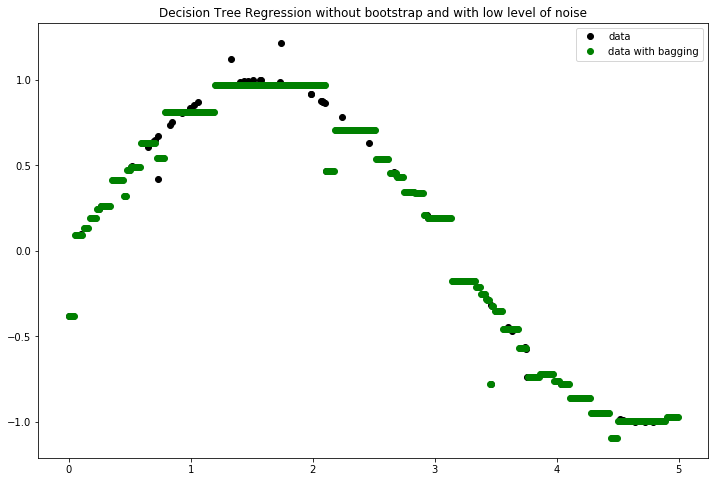

In [77]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::8] += 1 * (0.5 - rng.rand(10))    ## Low level of noise

n_estimators = 10 # L in the text
tree_max_depth = 6
# TODO define the regressor by bagging stumps
tree = DecisionTreeRegressor(criterion='mse', 
                             splitter='best', 
                             max_depth=tree_max_depth, 
                             min_samples_split=2) 
tree.fit(X, y)
bagging = BaggingRegressor(base_estimator=tree,
                           n_estimators=n_estimators, 
                           max_samples=1.0,
                           max_features=1.0,
                           bootstrap=False)   ### No boostrap is performed
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree = tree.predict(X_test)
bagging.fit(X,y)
y_bagging = bagging.predict(X_test)
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
# TODO add plots for Bagging/Tree
plt.plot(X_test, y_bagging, 'o', c="g", label="data with bagging")
plt.title("Decision Tree Regression without bootstrap and with low level of noise")
plt.legend(loc=1, numpoints=1)
plt.show()

# Random Forests

In [78]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.datasets import load_boston, load_diabetes, load_iris, load_digits
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

# Question 6

$ \textit {Evaluate the scores using Random Forests with a 7-fold cross-validation on the data-sets boston,
diabetes, iris and digits. Compare the performances with the ones of a linear SVM.} $

In [79]:
##Loading the datasets
boston = load_boston()
diabetes = load_diabetes()
iris = load_iris()
digits = load_digits()

In [80]:
## Extract features and labels
def X_y (dataset):
    y = dataset.target
    X = dataset.data
    return X,y
X , y = X_y (diabetes)

In [81]:
X , y = X_y (iris)
RFC = RandomForestClassifier(n_estimators=10)
scores_iris = cross_val_score(RFC, X, y, cv = 7, scoring='accuracy')
print ( "iris scores:", scores_iris)
print('The best score is :' ,min(scores_iris))

iris scores: [0.95833333 1.         0.9047619  0.95238095 0.85714286 1.
 1.        ]
The best score is : 0.8571428571428571


In [101]:
X , y = X_y (boston)
reg = RandomForestRegressor(n_estimators=100)
scores_boston=cross_val_score(reg, X, y, cv=7)
print ( "boston scores:", scores_boston)
print('The best score is :' ,min(scores_boston))

boston scores: [0.71330094 0.83127867 0.79984851 0.74440015 0.66835804 0.31990542
 0.49800785]
The best score is : 0.3199054195517168


In [83]:
X , y = X_y (diabetes)
RFC = RandomForestRegressor(n_estimators=10)
scores_diabetes = cross_val_score(RFC, X, y.astype('int'), cv = 6, scoring='accuracy')
print ( "diabetes scores:", scores_diabetes)
print('The best score is :' ,min(scores_diabetes))

diabetes scores: [0.         0.01538462 0.01612903 0.         0.2        0.        ]
The best score is : 0.0


In [84]:
X , y = X_y (digits)
RFC = RandomForestClassifier(n_estimators=10)
scores_digits = cross_val_score(RFC, X, y, cv = 7, scoring='accuracy')
print ( "digits scores:", scores_digits)
print('The best score is :' ,min(scores_digits))

digits scores: [0.82307692 0.93436293 0.82170543 0.91828794 0.93359375 0.93333333
 0.86904762]
The best score is : 0.8217054263565892


Calculating Score with SVM 

Text(0.5,1,'Score Dataset Iris with SVM')

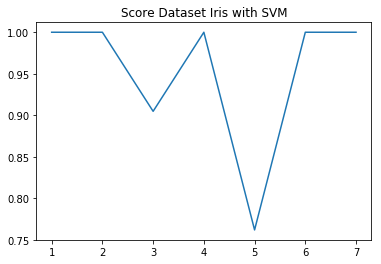

In [85]:
axe= np.arange(1,8)
X , y = X_y (iris)
clf = LinearSVC(random_state=0, tol=1e-5)
scores_svm_iris = cross_val_score(clf, X, y.astype('int'), cv = 7, scoring='accuracy')
plt.plot(axe, scores_svm_iris)
plt.title('Score Dataset Iris with SVM')

[0.05154639 0.03370787 0.02631579 0.10606061 0.06557377 0.10169492
 0.03448276]


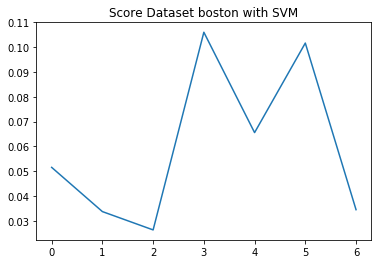

In [92]:
X , y = X_y (boston)

clf = LinearSVC()
scores_svm_boston = cross_val_score(clf, X, y.astype('int'), cv = 7, scoring='accuracy')
print ( scores_svm_boston) 
plt.plot( scores_svm_boston)
plt.title('Score Dataset boston with SVM')
plt.show()


Text(0.5,1,'Score Dataset Diabetes with SVM')

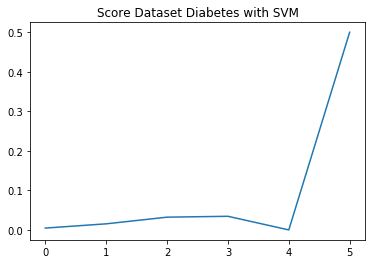

In [87]:
X , y = X_y (diabetes)

clf = LinearSVC(random_state=0, tol=1e-5)
scores_svm_diabetes = cross_val_score(clf, X, y.astype('int'), cv = 6, scoring='accuracy')

plt.plot( scores_svm_diabetes)
plt.title('Score Dataset Diabetes with SVM')

Text(0.5,1,'Score Dataset Digits with SVM')

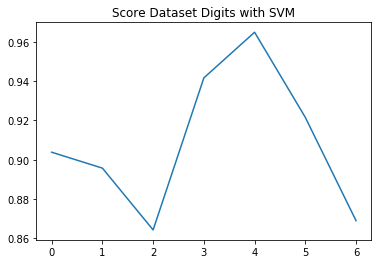

In [88]:
X , y = X_y (digits)

clf = LinearSVC(random_state=0, tol=1e-5)
scores_svm_digits = cross_val_score(clf, X, y.astype('int'), cv = 7, scoring='accuracy')
plt.plot( scores_svm_digits)
plt.title('Score Dataset Digits with SVM')

# Question 7

$ \textit {Using the data-set iris, limited to the first two variables features,  
show the prediction probabilities
for each class. Start from the following script where you will vary the number of random trees
(parameter n_estimators). } $

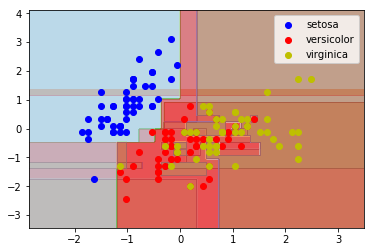

Prob_class1: 0.3333333333333333
Prob_class2: 0.30016666666666664
Prob_class3: 0.3665


0

In [93]:
# Parameters
n_estimators = 2
plot_colors = "bry"
plot_step = 0.02
# Load data
iris = load_iris()
X_unscaled, y = iris.data[:, :2], iris.target
# Standardize
X = preprocessing.scale(X_unscaled)
# RF fitting
model = RandomForestClassifier(n_estimators=n_estimators)
clf = model.fit(X, y)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
np.arange(y_min, y_max, plot_step))
plt.figure()

for tree in model.estimators_:
    Z = tree.predict(np.c_[xx.ravel(),yy.ravel()])  ## Calucl of Probabilities 
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha=1. / n_estimators, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, c in zip(range(3), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i], cmap=plt.cm.Paired)
plt.legend(scatterpoints=1)
plt.show()


def prob_class( model):
  
    probability = model.predict_proba(X)
    prob = np.sum( probability, axis = 0) 
    prob = prob/np.sum(prob)
    print("Prob_class1:", prob[0])
    print("Prob_class2:", prob[1])
    print("Prob_class3:", prob[2])
    return 0
  
prob_class( model)

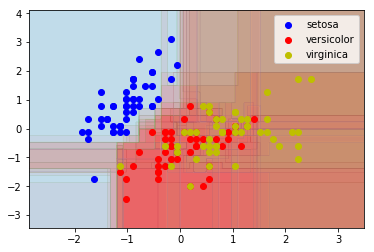

Prob_class1: 0.3333333333333333
Prob_class2: 0.34029523809523804
Prob_class3: 0.32637142857142853


0

In [94]:
# Parameters
n_estimators = 10
plot_colors = "bry"
plot_step = 0.02
# Load data
iris = load_iris()
X_unscaled, y = iris.data[:, :2], iris.target
# Standardize
X = preprocessing.scale(X_unscaled)
# RF fitting
model = RandomForestClassifier(n_estimators=n_estimators)
clf = model.fit(X, y)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
np.arange(y_min, y_max, plot_step))
plt.figure()

for tree in model.estimators_:
    Z = tree.predict(np.c_[xx.ravel(),yy.ravel()])  ## Calucl of Probabilities 
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha=1. / n_estimators, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, c in zip(range(3), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i], cmap=plt.cm.Paired)
plt.legend(scatterpoints=1)
plt.show()


def prob_class( model):
  
    probability = model.predict_proba(X)
    prob = np.sum( probability, axis = 0) 
    prob = prob/np.sum(prob)
    print("Prob_class1:", prob[0])
    print("Prob_class2:", prob[1])
    print("Prob_class3:", prob[2])
    return 0
  
prob_class( model)

# Question 8

Compare the scores between Random Forests with a 6-fold cross-validation and the pure decision
trees

In [95]:
scores_RandomForest = []
scores_decisionTrees = []
for i in range(1,30):
  
    RFC = RandomForestClassifier(n_estimators=10, max_depth = i)
    scores_RandomForest.append(np.mean(cross_val_score(RFC, X, y, cv = 6, scoring='accuracy')) )

    clf = DecisionTreeClassifier(random_state=0, max_depth = i)
    scores_decisionTrees.append( np.mean (cross_val_score (clf, X, y, cv = 6, scoring='accuracy')) )
#clf.fit(X,y)
#clf.score(X,y)

Text(0.5,1,'Score Random Forest 6 Folds CV')

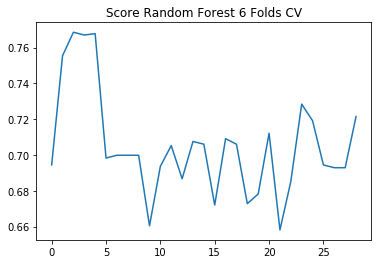

In [96]:
plt.plot(scores_RandomForest)
plt.title('Score Random Forest 6 Folds CV')

Text(0.5,1,'Score Decision Tree 6 Folds CV')

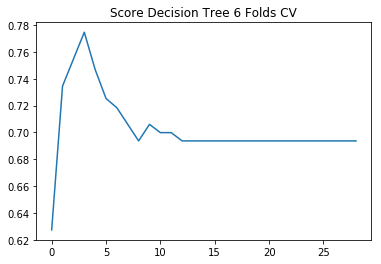

In [97]:
plt.plot(scores_decisionTrees)
plt.title('Score Decision Tree 6 Folds CV')

When the depth of the tree increase the tree tend to overfit the training data. We see that Random Forest scores are overall better. Our two models start to overfit from max_depth = 4, decision trees over fit faster. 

# Question 9

compare the performance of Extra random trees with Random Forest using 5-fold crossvalidation

For Iris Database :
The mean score of Random Forest obtained with 5_fold cross validation is  0.7133333333333333
The mean score of Extra Trees Classifier obtained with 5_fold cross validation is  0.74


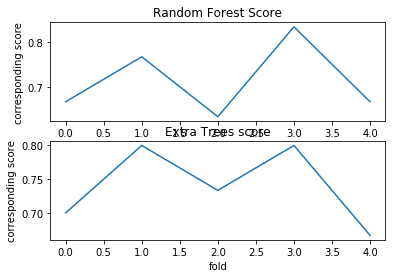

Extra trees
boston :
mean score =  0.049631185807656394


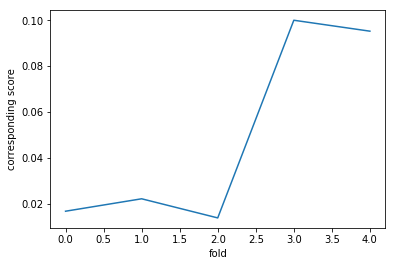

iris :
mean score =  0.9533333333333334


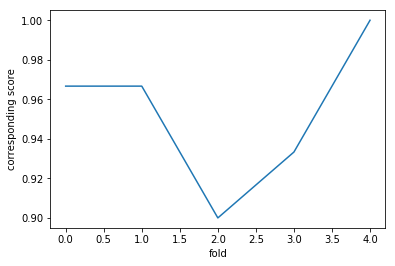

Random forest
boston :
mean score =  0.07117054751112585


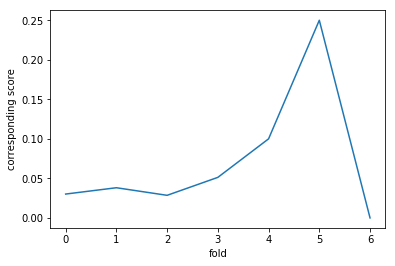

iris :
mean score =  0.9396258503401361


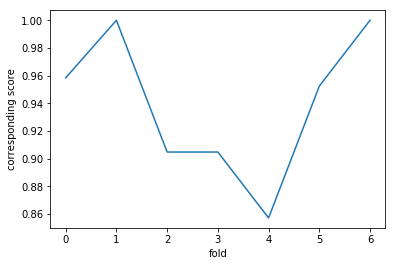

In [98]:
X_unscaled, y_iris = iris.data[:, :2], iris.target
X_iris = preprocessing.scale(X_unscaled)

RFC = RandomForestClassifier(n_estimators=10, max_depth = None)
scores_RandomForest= cross_val_score(RFC, X_iris, y_iris, cv = 5, scoring='accuracy')

ETC=ExtraTreesClassifier(n_estimators=10, criterion='gini',max_depth=None, min_samples_split=2)
scores_ExtraTrees = cross_val_score(ETC, X_iris, y_iris, cv = 5, scoring='accuracy') 

print('For Iris Database :')
print('The mean score of Random Forest obtained with 5_fold cross validation is ', np.mean(scores_RandomForest))
print('The mean score of Extra Trees Classifier obtained with 5_fold cross validation is ',np.mean(scores_ExtraTrees))


plt.subplot(2,1,1)
plt.plot(range(len(scores_RandomForest)),scores_RandomForest)
plt.xlabel("fold")
plt.ylabel("corresponding score")
plt.title('Random Forest Score')

plt.subplot(2,1,2)
plt.plot(range(len(scores_ExtraTrees)),scores_ExtraTrees)
plt.xlabel("fold")
plt.ylabel("corresponding score")
plt.title('Extra Trees score')
plt.show()

from sklearn.ensemble import ExtraTreesClassifier

boston = load_boston()
iris = load_iris()

Xboston, Yboston = boston.data, boston.target
Xiris, Yiris = iris.data, iris.target

lab_enc = preprocessing.LabelEncoder()
boston_training_scores_encoded = lab_enc.fit_transform(Yboston)


RFC = ExtraTreesClassifier(n_estimators=10)
bostonScore = cross_val_score(RFC, Xboston, boston_training_scores_encoded, cv = 5, scoring='accuracy')
irisScore = cross_val_score(RFC, Xiris, Yiris, cv = 5, scoring='accuracy')

print("Extra trees")
print("boston :")
print("mean score = ", np.mean(bostonScore))
plt.plot(range(len(bostonScore)), bostonScore)
plt.xlabel("fold")
plt.ylabel("corresponding score")
plt.show()

print("iris :")
print("mean score = ", np.mean(irisScore))
plt.plot(range(len(irisScore)), irisScore)
plt.xlabel("fold")
plt.ylabel("corresponding score")
plt.show()


print("Random forest")

RFC = RandomForestClassifier(n_estimators=10)
bostonScore = cross_val_score(RFC, Xboston, boston_training_scores_encoded, cv = 7, scoring='accuracy')
irisScore = cross_val_score(RFC, Xiris, Yiris, cv = 7, scoring='accuracy')

print("boston :")
print("mean score = ", np.mean(bostonScore))
plt.plot(range(len(bostonScore)), bostonScore)
plt.xlabel("fold")
plt.ylabel("corresponding score")
plt.show()

print("iris :")
print("mean score = ", np.mean(irisScore))
plt.plot(range(len(irisScore)), irisScore)
plt.xlabel("fold")
plt.ylabel("corresponding score")
plt.show()


For Boston Database :
The minium score of Random Forest obtained with 5_fold cross validation is  0.7133333333333333
The minium score of Extra Trees Classifier obtained with 5_fold cross validation is  0.74


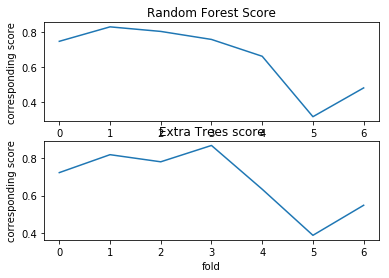

Accuracy_score of ExtraTree regressor on boston dataset: 0.68 (+/- 0.31)
Accuracy_score of randomForest regressor on dataset: 0.66 (+/- 0.35)



In [99]:
from sklearn.ensemble import  RandomForestClassifier,ExtraTreesClassifier ,RandomForestRegressor,ExtraTreesRegressor
X_boston, Y_boston = boston.data, boston.target
reg_etr = ExtraTreesRegressor(n_estimators=100)
score_etr = cross_val_score(reg_etr, X_boston, Y_boston, cv=7)

reg_rfr = RandomForestRegressor(n_estimators=100)
score_rfc=cross_val_score(reg_rfr, X_boston, Y_boston, cv=7)

print('For Boston Database :')
print('The minium score of Random Forest obtained with 5_fold cross validation is ', np.mean(scores_RandomForest))
print('The minium score of Extra Trees Classifier obtained with 5_fold cross validation is ',np.mean(scores_ExtraTrees))

plt.subplot(2,1,1)
plt.plot(range(len(score_rfc)),score_rfc)
plt.xlabel("fold")
plt.ylabel("corresponding score")
plt.title('Random Forest Score')

plt.subplot(2,1,2)
plt.plot(range(len(score_etr)),score_etr)
plt.xlabel("fold")
plt.ylabel("corresponding score")
plt.title('Extra Trees score')
plt.show()





print("Accuracy_score of ExtraTree regressor on boston dataset: %0.2f (+/- %0.2f)" % (score_etr.mean(), score_etr.std() * 2))
print("Accuracy_score of randomForest regressor on dataset: %0.2f (+/- %0.2f)\n" % (score_rfc.mean(), score_rfc.std()* 2))


# Question 10

Plot the feature importance (using an appropriate graphical tool) on both algorithms with iris dataset

Feature ranking for the random forest classifier:
1. feature 2 (0.459521)
2. feature 3 (0.441480)
3. feature 0 (0.082309)
4. feature 1 (0.016691)
Feature ranking for the extra trees classifier:
1. feature 3 (0.449762)
2. feature 2 (0.395781)
3. feature 0 (0.095502)
4. feature 1 (0.058955)


(-1, 4)

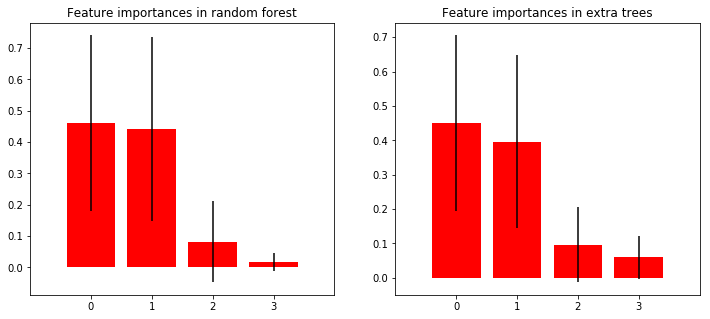

In [100]:
iris = load_iris()
Xiris, Yiris = iris.data, iris.target
X=Xiris
y=Yiris

clf_rfc = RandomForestClassifier(n_estimators=100)
clf_rfc.fit(Xiris,Yiris)

clf_etc = ExtraTreesClassifier(n_estimators=100)
clf_etc.fit(Xiris,Yiris)

fig, axs = plt.subplots(1,2, figsize=(12,5))

importances = clf_rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rfc.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking for the random forest classifier:")

for f in range(Xiris.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
# Plot the feature importances of the forest
axs[0].set_title("Feature importances in random forest")
axs[0].bar(range(Xiris.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
axs[0].set_xticks(indices)
axs[0].set_xlim([-1, Xiris.shape[1]])


importances = clf_etc.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_etc.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking for the extra trees classifier:")

for f in range(Xiris.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
axs[1].set_title("Feature importances in extra trees")
axs[1].bar(range(Xiris.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
axs[1].set_xticks(indices)
axs[1].set_xlim([-1, Xiris.shape[1]])